---
title: "practice 2"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: false
    code-summary: "Show the code"
---

In this practice we will find the frequency of an interesting oscillation in transpiration measured from a grapevine leaf using a LICOR 6400. We thank [Yotam Zait](https://plantscience.agri.huji.ac.il/yotam-zait) for providing us this interesting measurement.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
sns.set(style="ticks", font_scale=1.1)
pd.set_option('mode.chained_assignment', None)
%matplotlib widget

In [9]:
df = pd.read_csv("grapevine_E.csv",
                 index_col='date', parse_dates=True)
df

,E
date,
2023-07-10 10:37:30,0.004116
2023-07-10 10:38:30,0.004012
2023-07-10 10:39:30,0.003694
2023-07-10 10:40:30,0.003506
2023-07-10 10:41:30,0.003361
...,...
2023-07-13 20:14:23,0.000059
2023-07-13 20:15:23,0.000069
2023-07-13 20:16:23,0.000061


In [10]:
start = '2023-07-12'
end = '2023-07-13'
df = df[start:end]

[Text(0, 0.5, 'transpiration')]

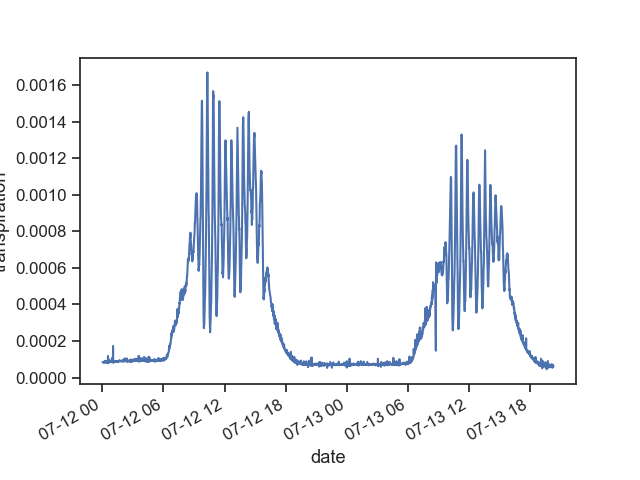

In [11]:
fig, ax = plt.subplots()
df['E'].loc[df['E']<4.5e-5] = np.nan
df['E'].ffill(inplace=True)
df['E'].plot()
ax.set(ylabel="transpiration")

The measurements shown above suggest that there is a clear oscillatory pattern in the grapevine transpiration. Zooming in, we see that the oscillation period is about once every half hour. Let's find out exactly what the period is.

[Text(0.5, 0, 'freq (Hz)'), Text(0, 0.5, '|F(freq)|')]

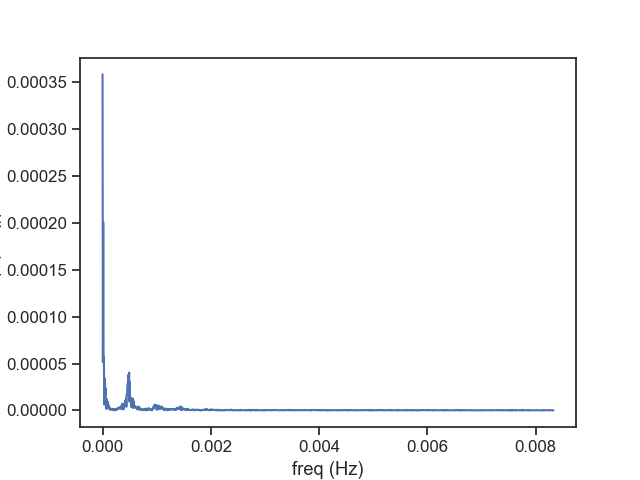

In [12]:
N = len(df)
F = scipy.fft.fft(df['E'].values) / N
n = np.arange(N)
# the basic time unit here is "second"
# measurements every 60 seconds
dt = 60  # seconds
freq = scipy.fft.fftfreq(N, d=dt)

# Get the one-sided spectrum
n_oneside = N//2
# get the one side frequency
k_oneside = freq[:n_oneside]
F_oneside = F[:n_oneside]
fig, ax = plt.subplots()
ax.plot(k_oneside, np.abs(F_oneside))
ax.set(xlabel='freq (Hz)',
       ylabel='|F(freq)|')

The first peak corresponds to very low frequencies (day), and the second peak is probably what we need. Let's focus on that.

[Text(0.5, 0, 'freq (Hz)'), Text(0, 0.5, '|F(freq)|')]

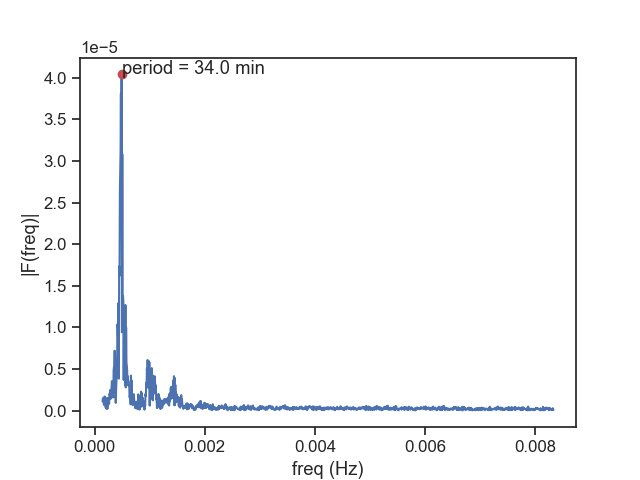

In [13]:
# ignore periods longer then 120 min
cutoff = 1 / (120*60)
mask = np.where(k_oneside > cutoff)
k_oneside = k_oneside[mask]
F_oneside = F_oneside[mask]

index_max = np.argmax(np.abs(F_oneside))
k_max = k_oneside[index_max]
F_max = np.abs(F_oneside[index_max])
period = 1 / k_max

fig, ax = plt.subplots()
ax.plot(k_oneside, np.abs(F_oneside))
ax.plot([k_max], [F_max], 'ro')
ax.text(k_max, F_max, f"period = {period / 60:.1f} min")
ax.set(xlabel='freq (Hz)',
       ylabel='|F(freq)|')